In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

from pathlib import Path
%config InlineBackend.figure_format='retina'
cwd = Path.cwd()

tract_info = pd.read_csv(f'{cwd.parent}/data/tract_info.csv')
cortices = list(set(tract_info.cortex))

df_subject = pd.read_csv(f'{cwd.parent}/data/subject_info.csv')
df_areas = pd.read_csv(f'{cwd.parent}/data/tract_cross-sectional-areas.csv')
df = pd.merge(df_subject, df_areas, on='id')


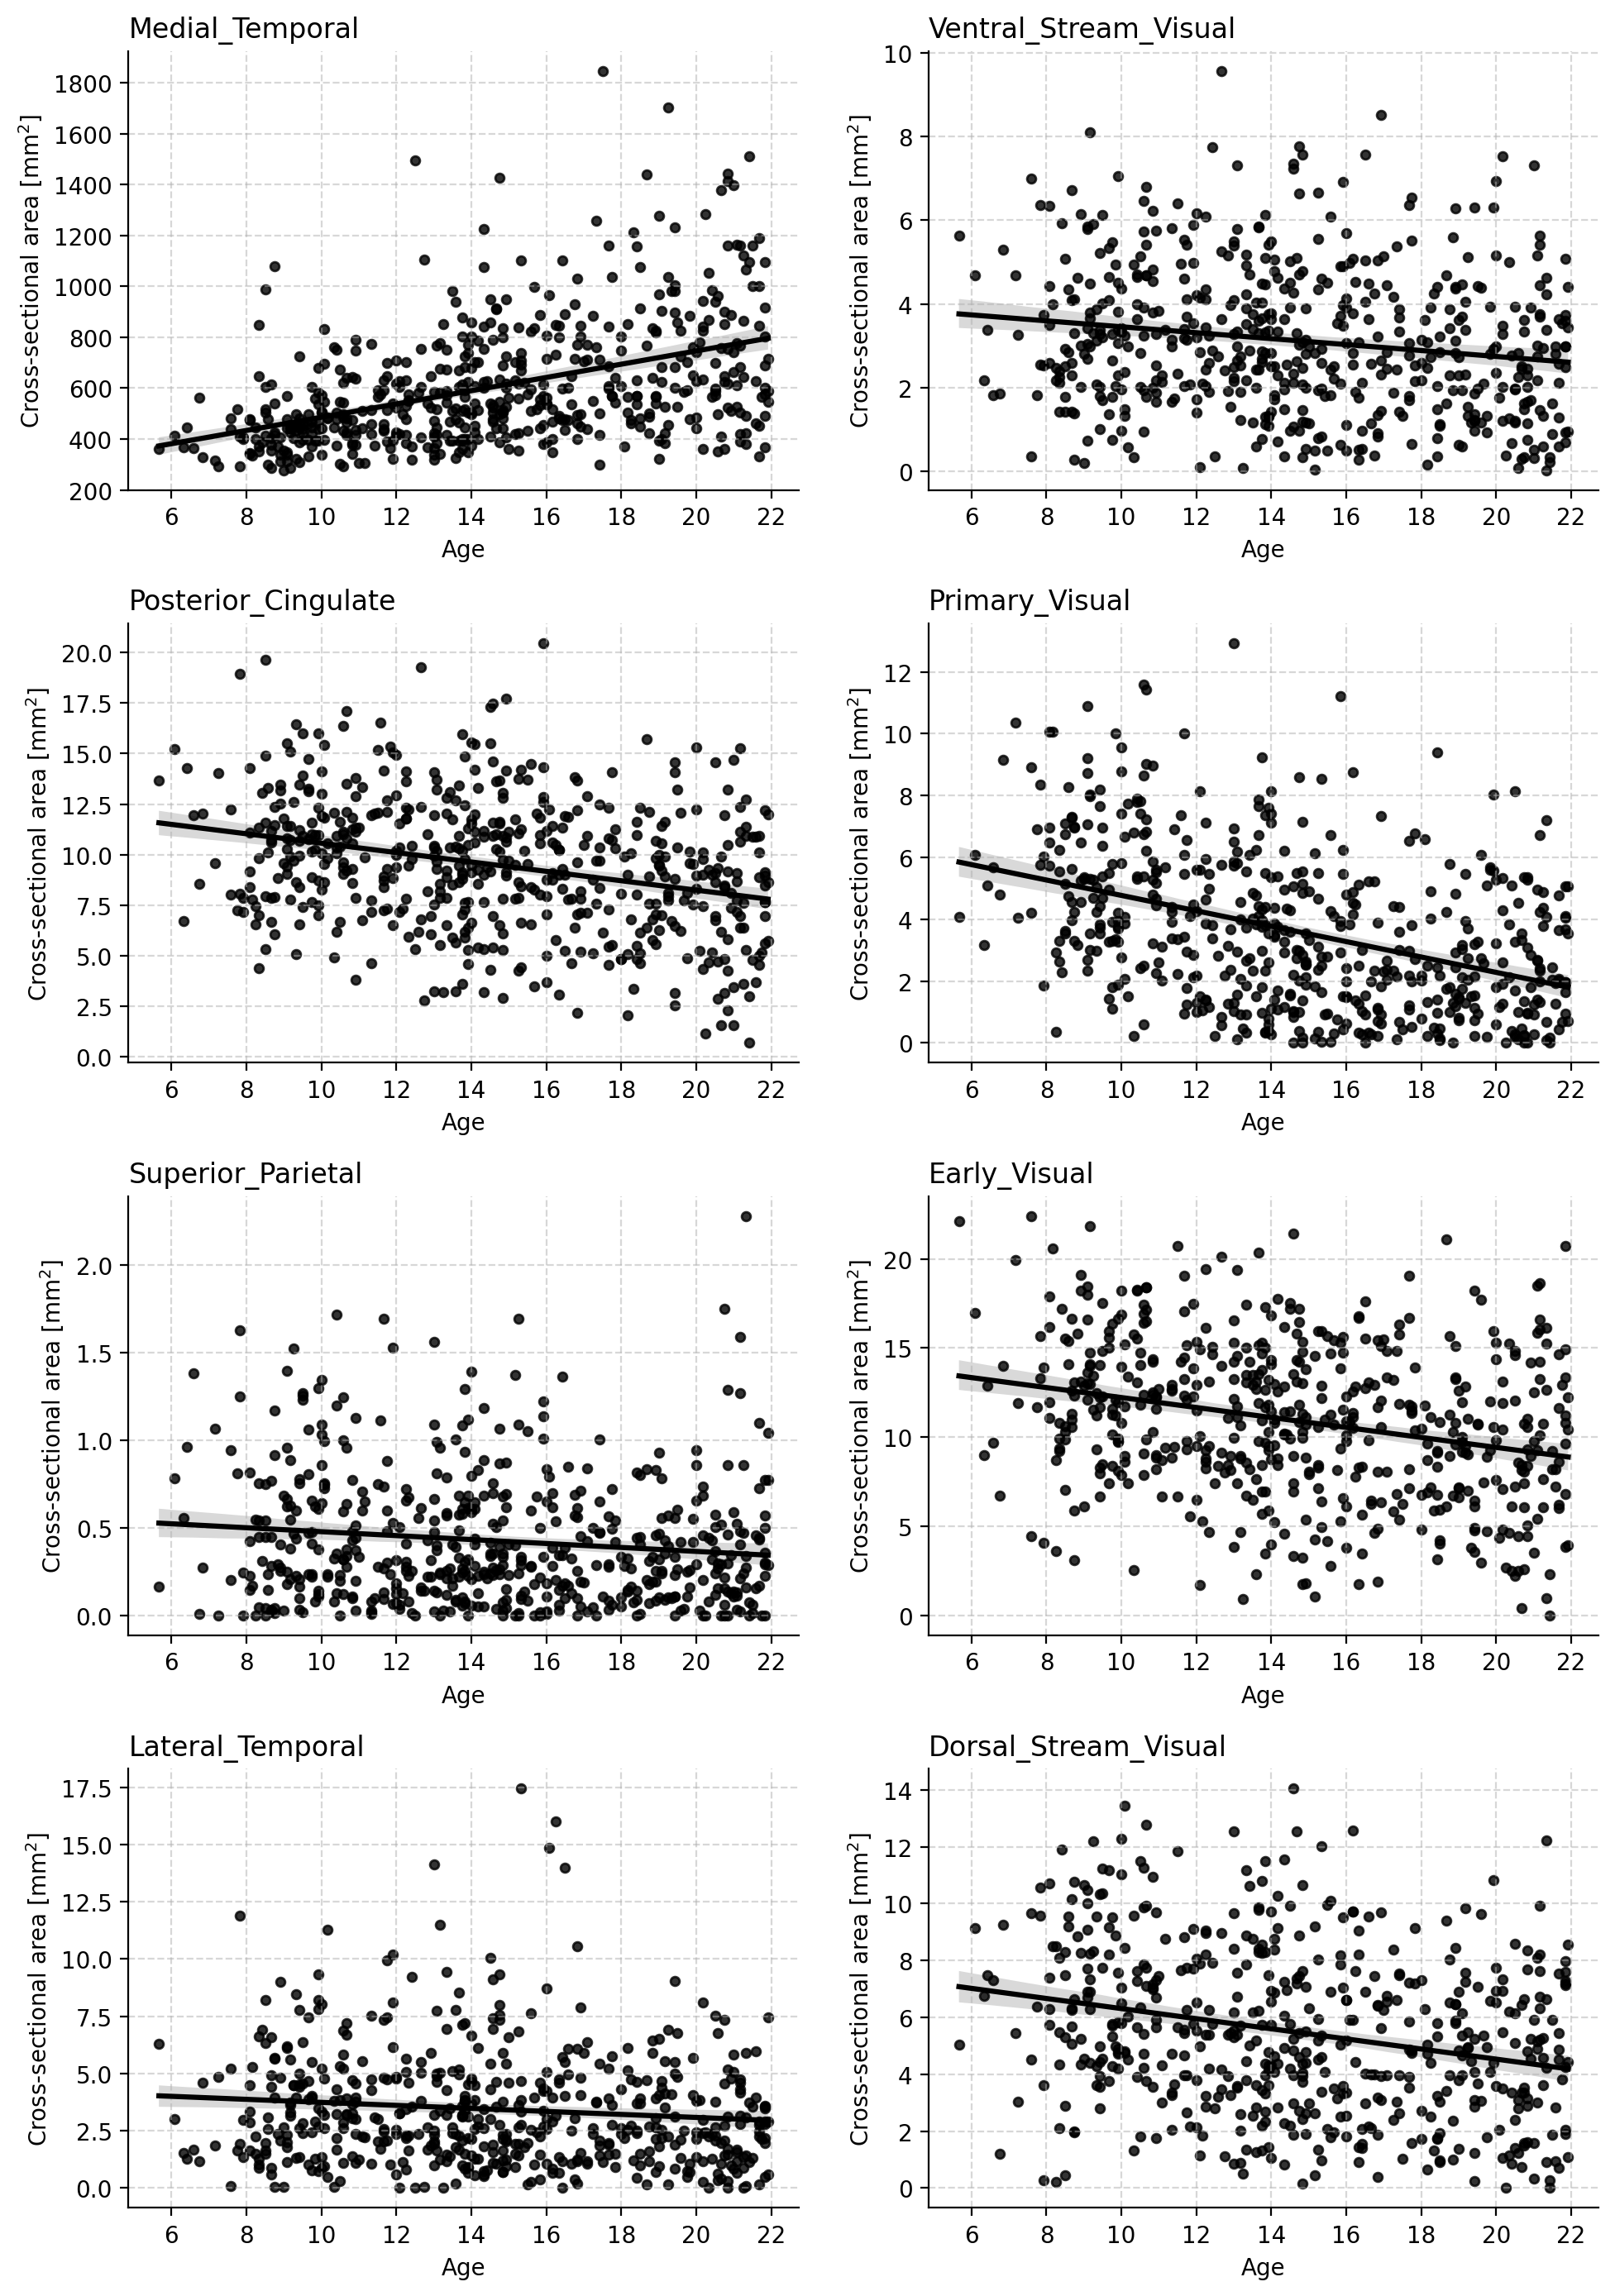

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(10, 14))
ax = ax.flatten()

for idx, cortex in enumerate(cortices):

    tracts = tract_info[tract_info.cortex == cortex].label

    sns.regplot(
        x=df['age'], y=df[tracts].sum(axis=1),
        color='k', ax=ax[idx],
        scatter_kws={'s':15}
    )
    ax[idx].set_title(cortex, loc='left')
    ax[idx].set_xlabel('Age')
    ax[idx].set_ylabel('Cross-sectional area [mm$^2$]')
    ax[idx].grid(linestyle='--', alpha=.5)
    sns.despine()

plt.tight_layout()
plt.savefig('plots/tract_area_regplots.svg')
plt.show()

